In [3]:
pip install catboost


   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 660.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/101.1 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 0.5/101.1 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 0.8/101.1 MB 4.4 MB/s eta 0:00:23
    --------------------------------------- 1.3/101.1 MB 6.0 MB/s eta 0:00:17
    --------------------------------------- 1.8/101.1 MB 7.2 MB/s eta 0:00:14
    --------------------------------------- 2.4/101.1 MB 7.8 MB/s eta 0:00:13
   - -------------------------------------- 3.0/101.1 MB 8.6 MB/s eta 0:00:12
   - -------------------------------------- 3.4/101.1 MB 8.7 MB/s eta 0:00:12
   - -------------------------------------- 4.0/101.1 MB 9.1 MB/s eta 0:00:11
   - -------------------------------------- 4.6/101.1 MB 9.1 MB/s eta 0:00:11
   -- ------------------------------------- 5.2/101.1 MB 9.6 MB/s eta

In [7]:
pip install shap



   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   -------- ------------------------------- 92.2/456.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 4.7 MB/s eta 0:00:00


In [11]:
pip install mrmr-selection


   ---------------------------------------- 0.0/31.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/31.4 MB 660.6 kB/s eta 0:00:48
   ---------------------------------------- 0.0/31.4 MB 660.6 kB/s eta 0:00:48
   ---------------------------------------- 0.2/31.4 MB 1.2 MB/s eta 0:00:26
   ---------------------------------------- 0.2/31.4 MB 1.5 MB/s eta 0:00:21
   ---------------------------------------- 0.4/31.4 MB 1.8 MB/s eta 0:00:18
    --------------------------------------- 0.5/31.4 MB 1.9 MB/s eta 0:00:17
    --------------------------------------- 0.6/31.4 MB 2.0 MB/s eta 0:00:16
    --------------------------------------- 0.7/31.4 MB 2.0 MB/s eta 0:00:16
   - -------------------------------------- 0.8/31.4 MB 2.0 MB/s eta 0:00:15
   - -------------------------------------- 1.0/31.4 MB 2.2 MB/s eta 0:00:15
   - -------------------------------------- 1.0/31.4 MB 2.1 MB/s eta 0:00:15
   - -------------------------------------- 1.2/31.4 MB 2.1 MB/s eta 0:00:15
  


Correlation Matrix:
                                        Duration  FlowBytesSent  FlowSentRate  \
Duration                                1.000000       0.392443     -0.022848   
FlowBytesSent                           0.392443       1.000000     -0.000044   
FlowSentRate                           -0.022848      -0.000044      1.000000   
FlowBytesReceived                       0.129426       0.297814     -0.001060   
FlowReceivedRate                       -0.069319      -0.003849      0.559234   
PacketLengthVariance                   -0.014433      -0.028393     -0.005464   
PacketLengthStandardDeviation          -0.059571      -0.072790     -0.016166   
PacketLengthMean                       -0.061179      -0.037032     -0.010803   
PacketLengthMedian                     -0.019566       0.023176      0.001416   
PacketLengthMode                       -0.073774      -0.017487     -0.000778   
PacketLengthSkewFromMedian             -0.062925      -0.005976     -0.033140   
PacketL

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:23<00:00,  1.16s/it]



Selected features: ['Duration', 'PacketLengthCoefficientofVariation', 'PacketLengthMedian', 'FlowBytesSent', 'ResponseTimeTimeSkewFromMedian', 'PacketTimeSkewFromMedian', 'ResponseTimeTimeMean', 'ResponseTimeTimeCoefficientofVariation', 'PacketLengthMode', 'PacketTimeMode', 'PacketLengthVariance', 'PacketLengthMean', 'PacketTimeCoefficientofVariation', 'FlowReceivedRate', 'PacketLengthStandardDeviation', 'PacketTimeSkewFromMode', 'PacketLengthSkewFromMode', 'FlowBytesReceived', 'ResponseTimeTimeStandardDeviation', 'FlowSentRate']

Cross-validation scores: [0.88658715 0.99610317 0.99762952 0.99919635 0.99832331]
Mean cross-validation score: 0.9755679006519525
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .........depth=5, iterations=50, learning_rate=0.01; total time=   3.4s
[CV] END .........depth=5, iterations=50, learning_rate=0.01; total time=   3.7s
[CV] END .........depth=5, iterations=50, learning_rate=0.01; total time=   3.5s
[CV] END ..........depth=5, 

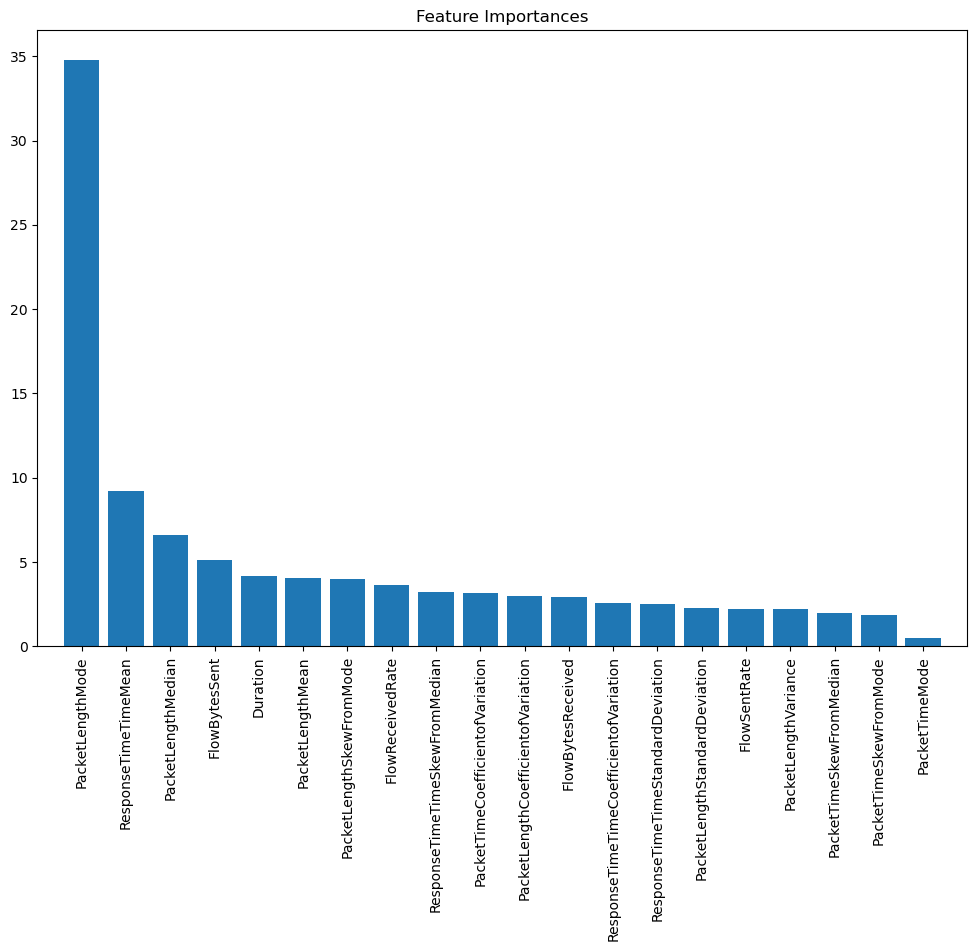

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import shap
from mrmr import mrmr_classif

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Adjust numpy types
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

# Load the datasets
doh_data = pd.read_csv('l1-doh.csv')
nondoh_data = pd.read_csv('l1-nondoh.csv')

# Add labels to the datasets
doh_data['Label'] = 'DoH'
nondoh_data['Label'] = 'NonDoH'

# Combine DoH and Non-DoH datasets
data = pd.concat([doh_data, nondoh_data], ignore_index=True)

# Drop unnecessary columns
columns_to_drop = ['SourceIP', 'SourcePort', 'DestinationIP', 'DestinationPort', 'TimeStamp']
data = data.drop(columns_to_drop, axis=1)

# Define numeric columns
numeric_columns = ['Duration', 'FlowBytesSent', 'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate', 
                   'PacketLengthVariance', 'PacketLengthStandardDeviation', 'PacketLengthMean', 'PacketLengthMedian', 
                   'PacketLengthMode', 'PacketLengthSkewFromMedian', 'PacketLengthSkewFromMode', 
                   'PacketLengthCoefficientofVariation', 'PacketTimeVariance', 'PacketTimeStandardDeviation', 
                   'PacketTimeMean', 'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMedian', 
                   'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation', 'ResponseTimeTimeVariance', 
                   'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 
                   'ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation']

# Separate features and target
X = data[numeric_columns]
y = data['Label']

# Encode categorical target variable 'Label'
le = LabelEncoder()
y = le.fit_transform(y)

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame to calculate correlations
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Calculate correlation matrix
correlation_matrix = X_scaled_df.corr()

# Display correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Identify highly correlated features (threshold > 0.9)
correlation_threshold = 0.9
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > correlation_threshold)]

# Drop highly correlated features
removed_features = []
for col in highly_correlated_features:
    corr_values = correlation_matrix.loc[correlation_matrix[col].abs() > correlation_threshold, col].to_dict()
    removed_features.append((col, corr_values))

X_scaled_df = X_scaled_df.drop(columns=highly_correlated_features)

# Check if any features are left
if X_scaled_df.shape[1] == 0:
    raise ValueError("No features left after removing highly correlated features. Adjust correlation threshold.")

print(f"\nHighly correlated features removed:")
for feature, corr_values in removed_features:
    print(f"Feature: {feature}, Correlation Values: {corr_values}")

# Apply mRMR feature selection
selected_features = mrmr_classif(X_scaled_df, y, K=20)  # Adjust K to select the desired number of features

print('\nSelected features:', selected_features)

# Reduce dataset to selected features
X_selected = X_scaled_df[selected_features]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Cross-validation
scores = cross_val_score(CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, verbose=0, random_seed=42),
                         X_selected, y, cv=5, scoring='accuracy')
print(f'\nCross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')

# Hyperparameter tuning
param_grid = {
    'iterations': [50, 100, 200],
    'depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(CatBoostClassifier(verbose=0, random_seed=42), param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print(f'\nBest parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_}')

# Train CatBoost classifier with best parameters
best_catboost = grid_search.best_estimator_
best_catboost.fit(X_train, y_train)

# Evaluate model
y_pred = best_catboost.predict(X_test)

# Convert predictions back to original labels
y_test_original = le.inverse_transform(y_test)
y_pred_original = le.inverse_transform(y_pred)

print('\nAccuracy:', accuracy_score(y_test_original, y_pred_original))
print('Classification Report:')
print(classification_report(y_test_original, y_pred_original))

# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test_original, y_pred_original))

# Feature importance analysis
importances = best_catboost.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_selected.shape[1]), importances[indices], align="center")
plt.xticks(range(X_selected.shape[1]), [X_selected.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_selected.shape[1]])
plt.show()

# Model interpretation with SHAP
explainer = shap.Explainer(best_catboost)
shap_values = explainer(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test)